## 14.4
### 問.
次のように判定問題Sat-5Clausesを定義する．入力はCNF形式のブール式Bで, 少なくとも5つの節を同時に充足させられれば解は"yes" となる．Sat-5ClausesはNP完全か．答えには厳密な証明を付けよ．

### 答.
Sat-5Clausesは少なくとも5つの節を同時に充足させられる解をヒントとしてを与えられれば多項式時間で検証できるのでクラスNPに属する.

SAT問題$\le_{P}$Sat-5Clauses問題を示す.

入力における節の数が5未満のとき, 5個の節から構成されるように変数を追加する. これは定数時間で実行可能.

入力における節の数が5以上のとき, どうしたらいいんや。。。



## 14.9 
###  問
HalfUhc問題（321 ページの主張14.4）と同じように, 閉路に含まれる節点数を全体の1/4以上とするQuarterUhc問題を定義する．   
(a) QuarterUhc問題がNP完全であることを証明せよ．  
(b) Uhc問題からQuarterUhc問題への多項式時間還元をPythonで実装せよ（ヒント：convertUhcToHalfUhc.pyから始めよ）．

### 答 (a)

QuarterUhc問題は節点数を全体の1/4以上含む閉路をヒントとすれば解を多項式時間で検証できるためクラスNPに含まれる.
Uhc問題$\le_{P}$QuarterUhc問題を示すことで, UhcがNP完全であることから題意は示される.

Uhc問題のインスタンス$G$と同じグラフを3つ複製し, もとのグラフを含め, それぞれの間の辺が存在しないグラフ$G^{\prime}$を用意する.  
$G$がハミルトン閉路をもつときかつそのときに限り, $G^{\prime}$はクオーターハミルトン閉路ををもつ.  
$G$から$G^{\prime}$への変換は多項式時間で実装される.

In [24]:
# (b):

import utils; from utils import rf
from graph import Graph, Edge

def convertUhcToHalfUhc(inString):
    # G is the original instance
    G = Graph(inString, weighted = False, directed = False)
    # newG is the converted instance -- create an empty graph using empty string
    newG = Graph('', weighted = False, directed = False)
    # Create all of the nodes of newG -- a pair of ``twin'' A-, and B-
    # nodes in newG for every node in G.
    for node in G:
        # Create twins.
        nodeA = node + 'A'
        nodeB = node + 'B'
        newNodes = (nodeA, nodeB)
        for newNode in newNodes:
            newG.addNode(newNode)
    # Create all the remaining edges of newG, i.e., create twin edges
    # corresponding to each edge in G.
    for edge in G.edges():
        node1, node2 = edge.nodes
        newG.addEdge( Edge( [node1 + 'A', node2 + 'A'] ) )
        newG.addEdge( Edge( [node1 + 'B', node2 + 'B'] ) )

    return str(newG)

def convertUhcToQuarterUhc(inString):
    G_2 = convertUhcToHalfUhc(inString)
    # inStringの文字数をnとして, G_2の文字数は2n+1
    newG = convertUhcToHalfUhc(G_2)
    return newG

In [25]:
# 可視化用関数
import graphviz 

def hc_to_diagram(hc_string, is_directed: bool):
    edges = hc_string.split(' ')

    g = graphviz.Digraph() if is_directed else graphviz.Graph()
    for edge in edges:
        [src, dst] = edge.split(',')
        g.edge(src, dst)

    return g

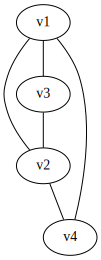

In [26]:
G = "v1,v2 v3,v2 v1,v3 v2,v4 v4,v1"
hc_to_diagram(G, is_directed=False)

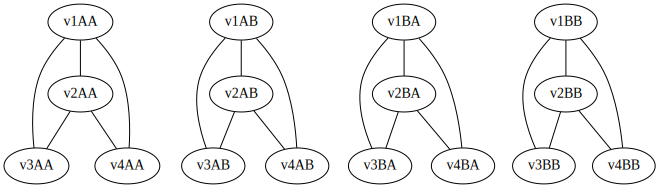

In [27]:
newG = convertUhcToQuarterUhc(G)
hc_to_diagram(newG, is_directed=False)

## 14.14
### 問
CNF形式で書かれたブール式Bを入力とし, Bの節の少なくとも半分を充足させられなければ"no", そうでなければBの節の少なくとも半分を充足させられる割り当てを解とする計算問題HalfSatについて考える．例えば, 入力"(x1 OR NOT x2) AND (x2) AND (NOT x1)"は, "x1=1, x2=1"という割り当てが3つの節のうちの2つを充足させるので正インスタンスであり, この割り当てが積極解になる．HalfSat問題がNP困難であることを証明せよ．
### 答
SAT問題$\le_{P}$HalfSat問題を示す.

新しい変数dを導入し, Bの中で使われいる各変数について2種類の変数を以下の例にならって作成する.
例: x1
- x1a = x1 AND d ... (a)
- x1b = x1 AND NOT d ... (b)

もともとのBの式を(a)の変数で置き換えたものをoutputa, (b)変数で置き換えたものをoutputbと置く.  
各変数の作成式と最後の出力を一連のブール回路としてTseytin変換を用いてoutputaとoutputbのそれぞれに相当するCNF形式のブール式作成し両者をANDでつなげたものをB${}^\prime$とする.

このときBが充足可能なときかつそのときに限りB${}^\prime$は半分の節が同時に充足可能となる.

(a)および(b)の作成が$O(n)$で行われ, 文字数の増加分も線形で抑えらる. Tseytin変換は多項式時間で行われるため, 一連の変換は多項式時間で行われる.